In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing data from github and converting into a DataFrame
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
data.head()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
data.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [6]:
#finding number of rows and columns
data.shape

(30, 17)

In [7]:
#understanding the data at high level i.e. checking the statistics of the data
data.describe()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observations from the above dataset after finding out the statistics of the data:-

1.The difference between mean and standard deviation is appears to be good in all the features except CG (Complete Game) where the standard deviation is not much less as compared to the mean.

2.Also the difference between all the quantiles for all the features is not very big

3.As the count is found out to be 30 here which is matching the number of rows so we can say that there is no null values(NANs) present in the dataset.

4.There are 30 rows and 17 columns present in the dataset.

5.Minimum vaule for CG(complete game) is 0.

In [8]:
#finding the null values in each column
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

We have crossed checked for the null values and we found out zero NANS in the dataset.

In [9]:
#no. of columns in the dataset
data.columns


Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [10]:
#checking different datatypes present in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


As there is no object datatype present here so we do not need to use encoder.

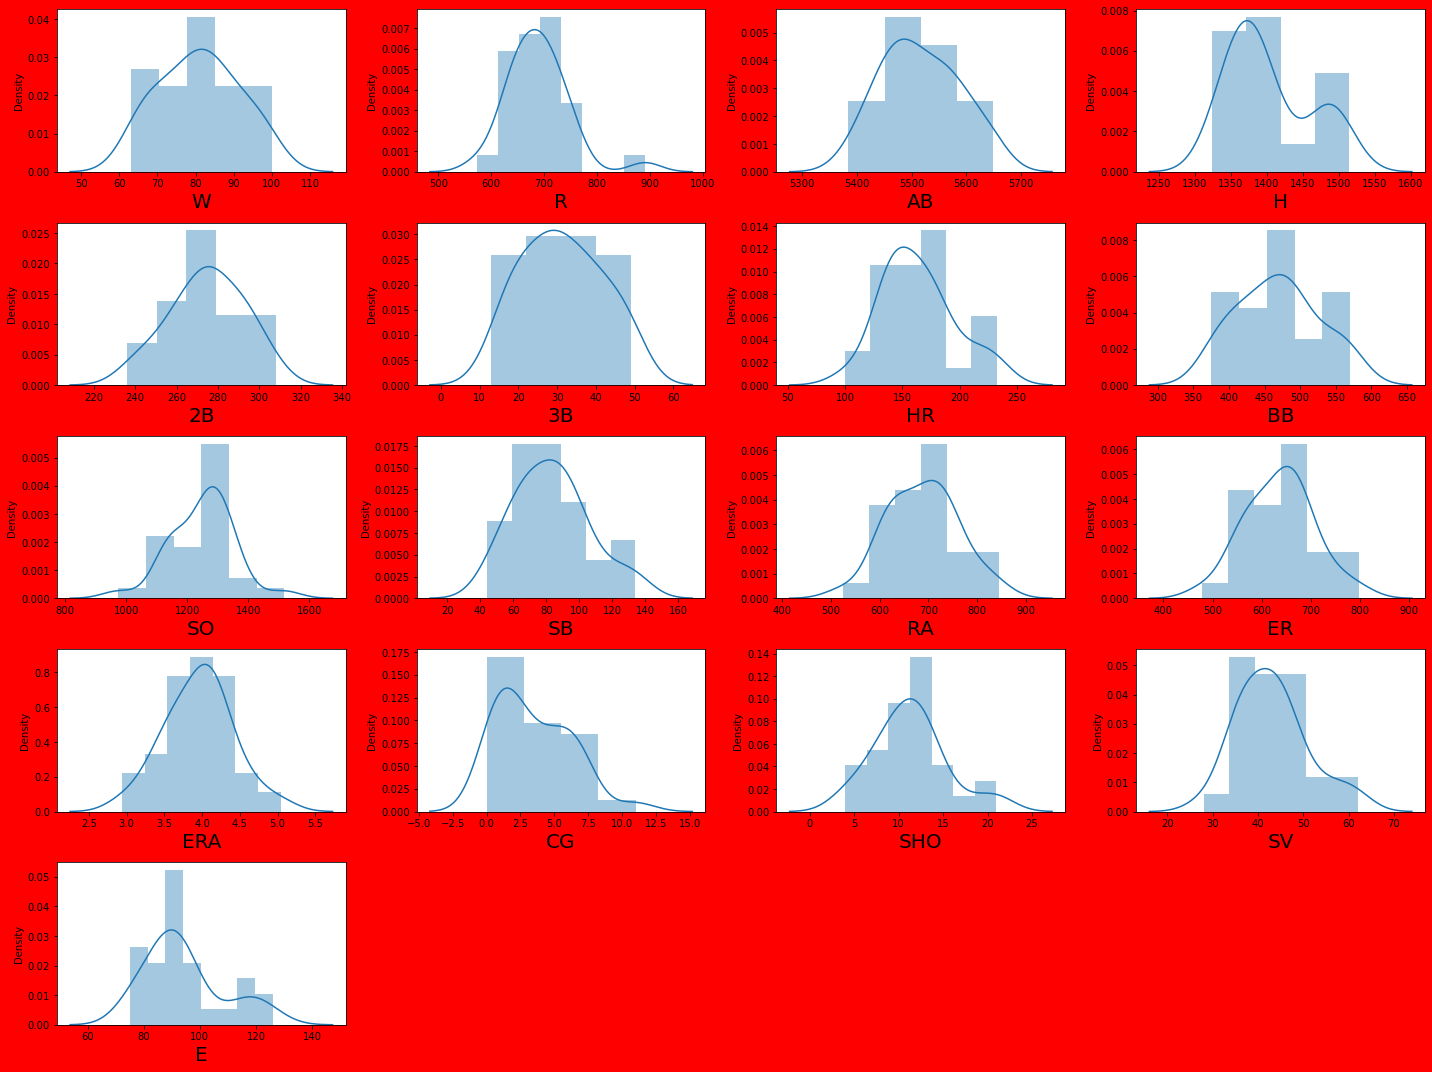

In [11]:
# now the data looks good and there is no missing values so we can start visualizing the type of distribution for each feature
# we will only evaluate the type of distribution for features having continious data here

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

The data distribution looks decent enough for most of the features i.e. it shows normal distribution for most of the features(the curve is bell shaped) except some features like CG(Complete Game), R(Runs scored) and SHO(Shutout) where we observed a little skewness. now lets find out if there is actual skewness in some features i.e. whether they have outliers by plotting box plots. 

In [12]:
df_features=data.drop('W', axis=1)

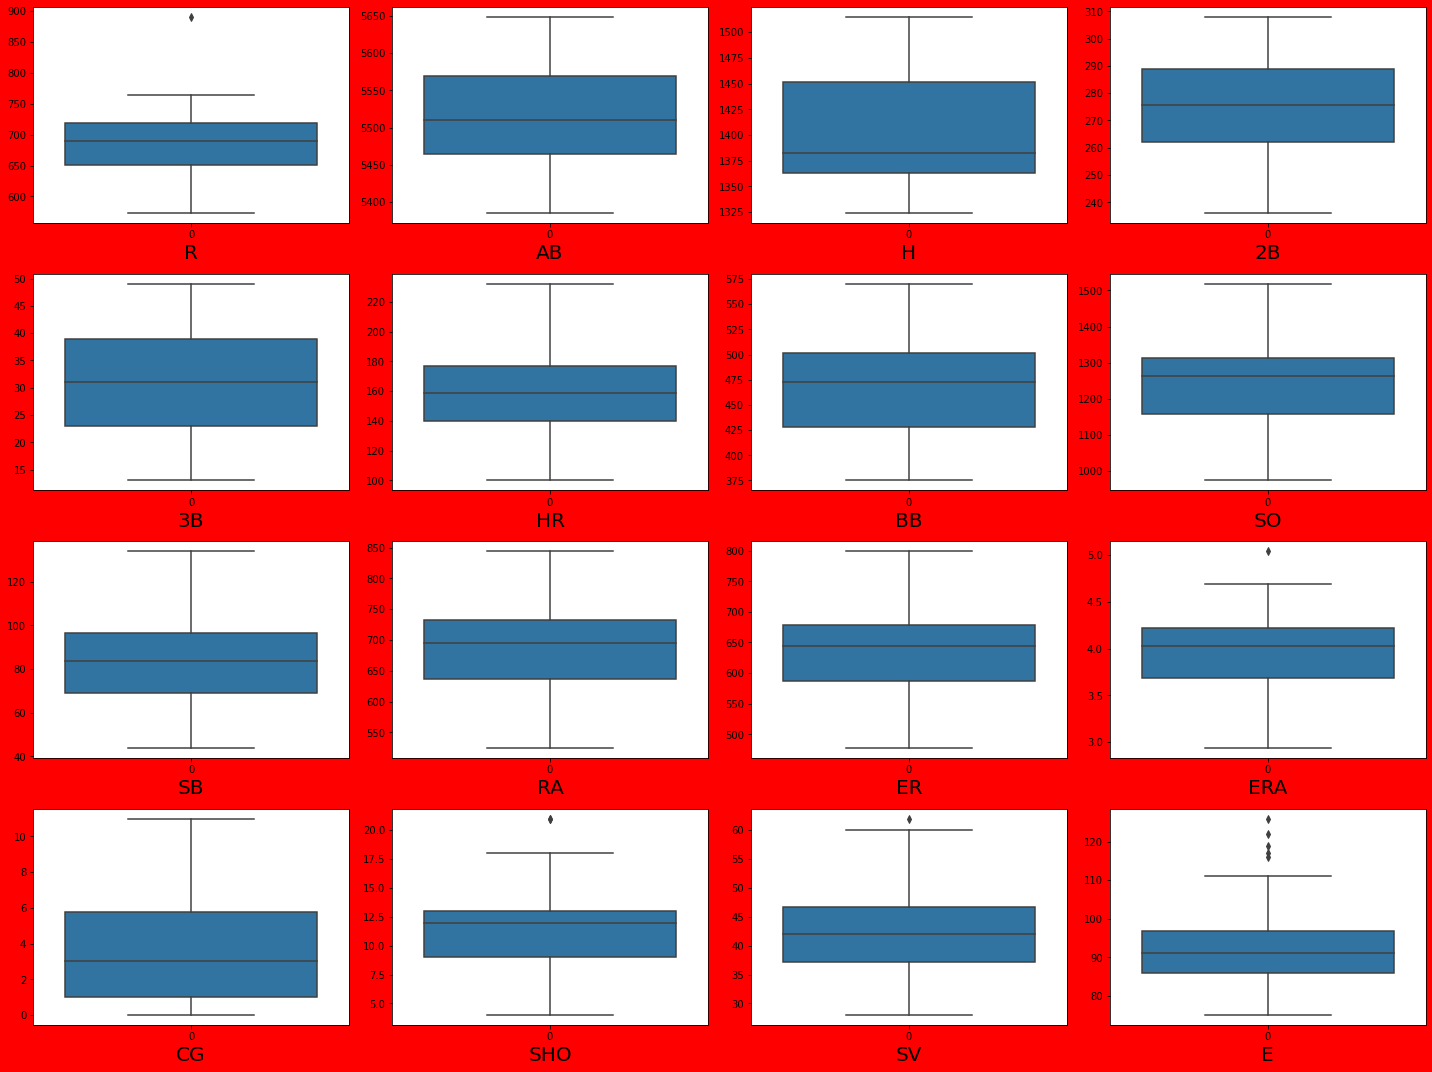

In [13]:
#Now lets find the outliers by ploting box plots

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in df_features:
    if plotnumber<=16:
        plt.subplot(4,4,plotnumber)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

Observations from the box plots

1.Runs scored(R) have outliers between 850 and 900

2.Earned Runs Average(ERA) has outliers between 4.5 and 5.0

3.Shutout(SHO) has outliers above 20.0

4.Save(SV) has outliers above 60

5.Errors has outliers above 110

6.Rest all the features have no outliers.

Lets see if we need to remove all the outliers as the dataset is already very small and if we remove some values from it then it would be even smaller and it will result in affecting the model.

In [14]:
# relation between the features and labels

y=data['W']
x=data.drop(columns=['W'])

In [15]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [16]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [17]:
#finding the corelation between the features in the data set
data.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [18]:
#sortinh the correlation values in assending order for the label(W)
data.corr()['W'].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

<AxesSubplot:>

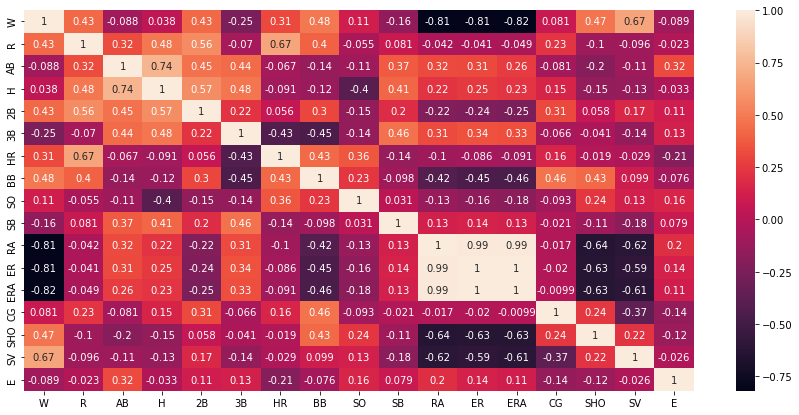

In [19]:
#now lets find out the co relation using heatmap plot.
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

We can see that some of the features are highly correlated here and some are not that highly correlated lets find out more about it using the scatter plot.

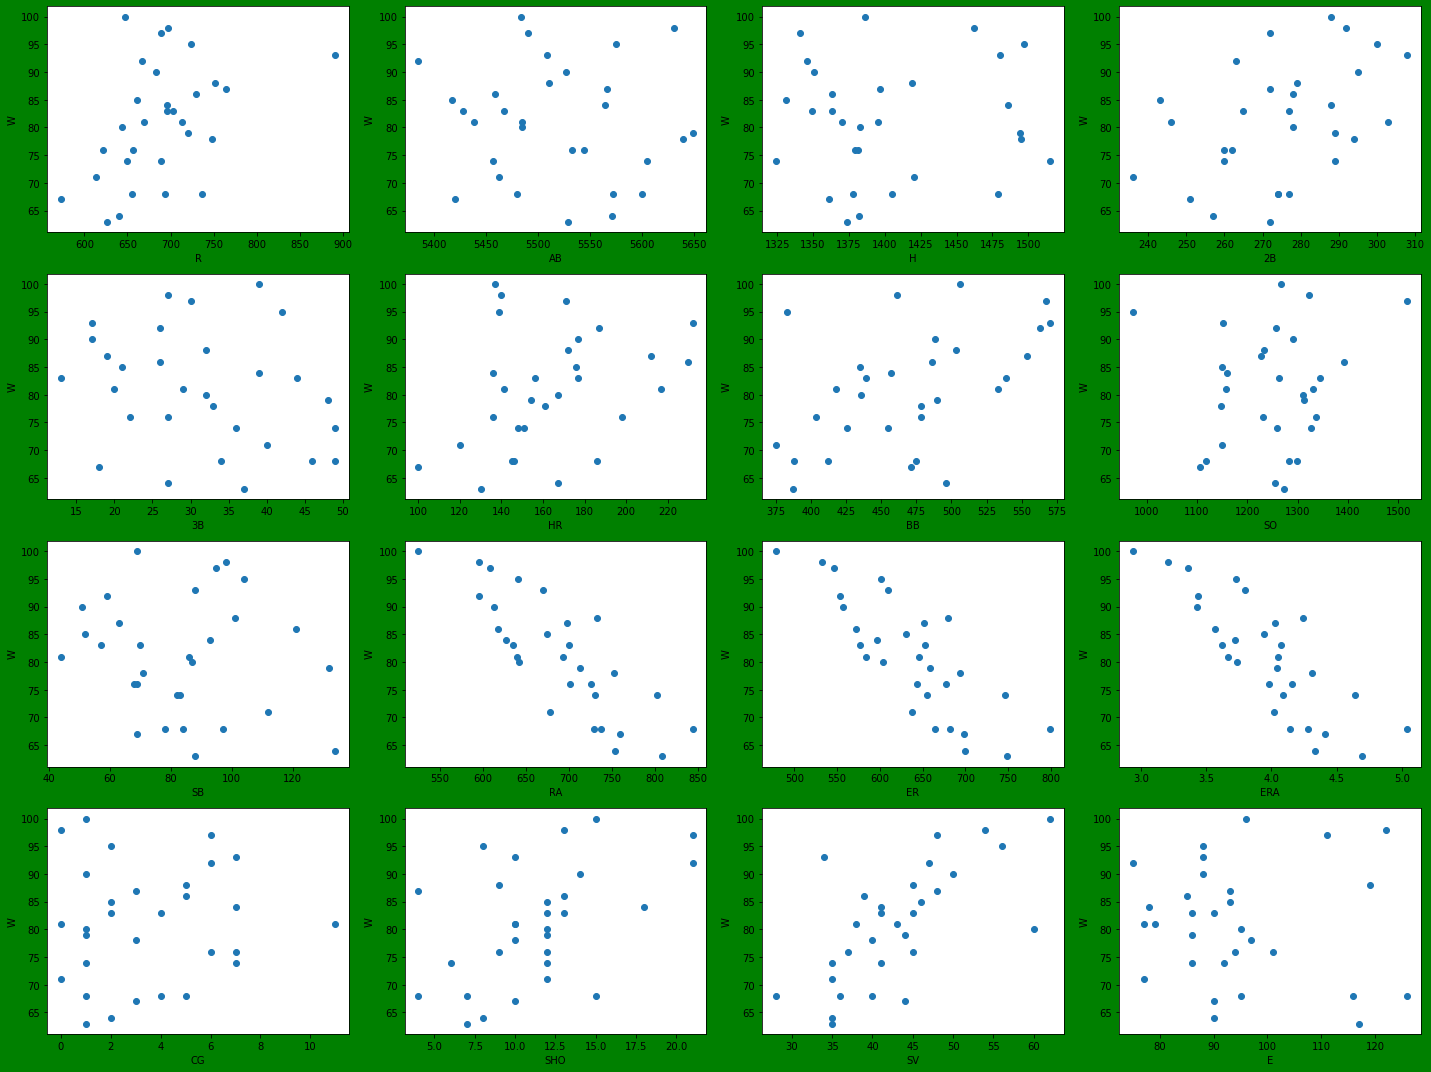

In [21]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('W',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

The trend is not clear here, so lets plot the regplot for a better view of the trend in relationship between the features and the label.

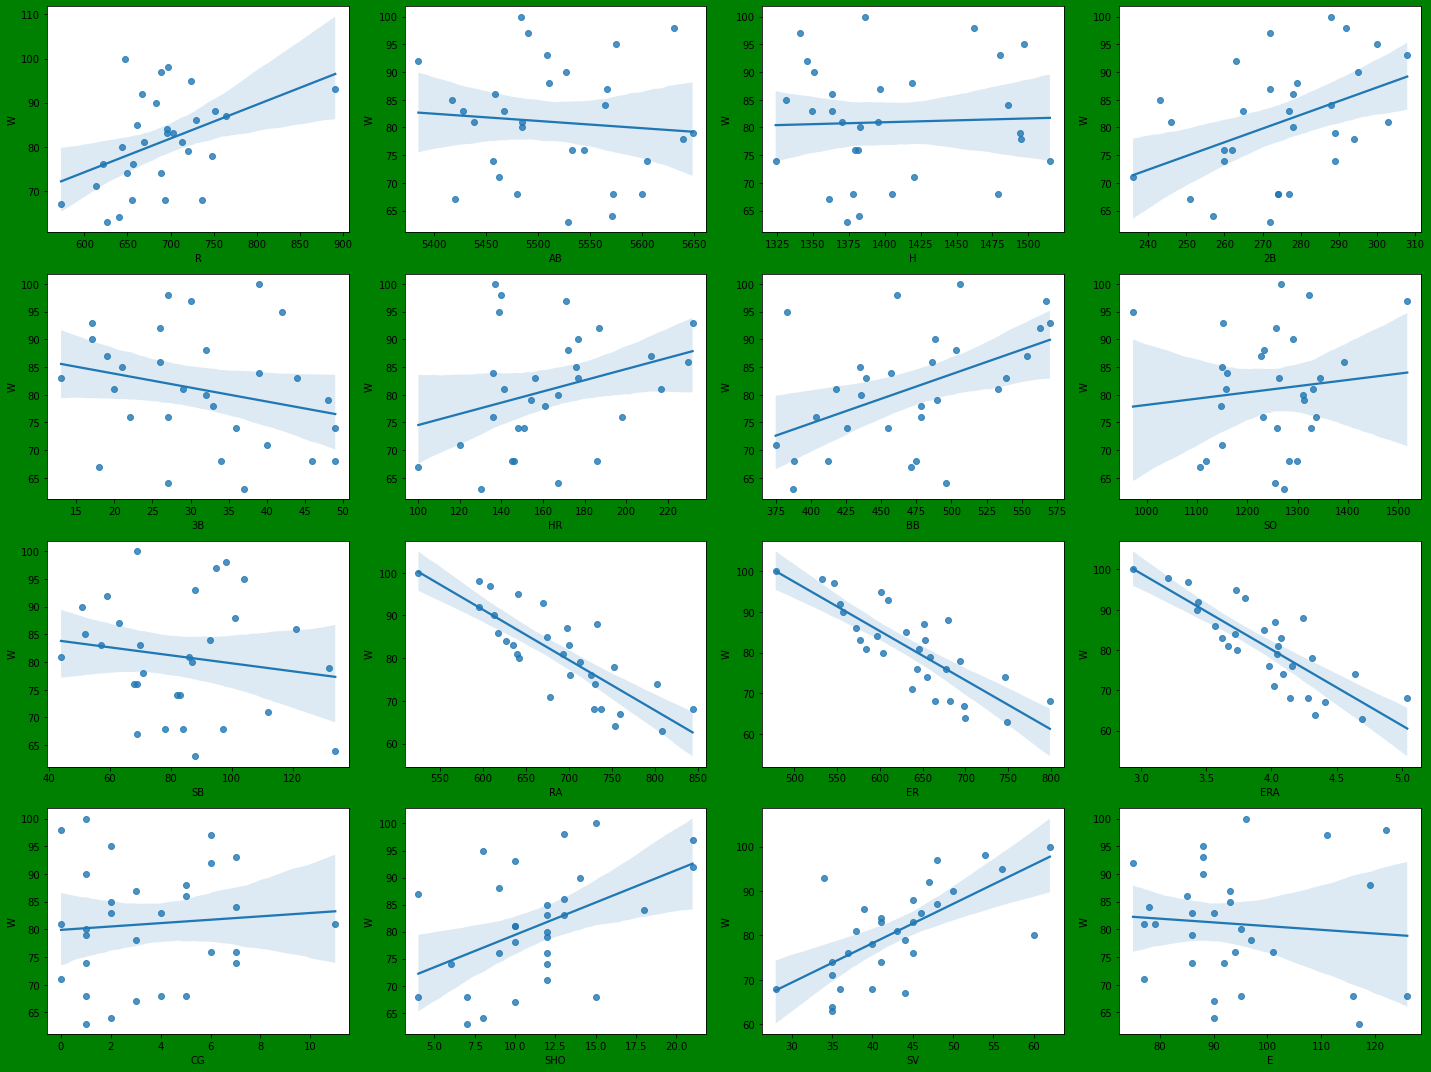

In [22]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.regplot(x[column],y)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('W',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

Observations from the regplot:-

1.Runs scored , hit, Doubles, walks ,Strike outs,Shutout and save are positively co-related with wins as the trend is in upward direction.

2.At bat,Homerun,Complete game and errors are weakly co-related with the the label( wins) as trend is neither completely upward nor completely downward.

3.Tripple, stolen base, Run average, Earned run, Earned run average are negatively co-related with the label(wins) as the trend is in downward direction.


In [23]:
data.shape

(30, 17)

In [24]:
#assigning our datset to a new variable for testing the feasibility after removing the outliers
df=data

Now lets deal with the outliers and see whether it is feasible in this dataset

In [25]:
#Finding the IQR(Inter Quantile range) to finding the outliers

#1st quantile
q1=df.quantile(0.25)
#3rd quantile
q3=df.quantile(0.75)

#IQR
iqr=q3 -q1

iqr

W       13.7500
R       67.0000
AB     106.0000
H       88.5000
2B      26.5000
3B      16.0000
HR      36.7500
BB      73.0000
SO     154.0000
SB      27.5000
RA      96.2500
ER      92.0000
ERA      0.5375
CG       4.7500
SHO      4.0000
SV       9.5000
E       10.7500
dtype: float64

In [26]:
#removing the outliers for Runs
runs_high=q3.R + (1.5 * iqr.R)


index=np.where(df['R'] > runs_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(29, 17)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [27]:
#removing the outliers for Earned run average
era_high=q3.ERA + (1.5 * iqr.ERA)


index=np.where(df['ERA'] > era_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(28, 17)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [28]:
#removing the outliers for Shutout
sho_high=q3.SHO + (1.5 * iqr.SHO)


index=np.where(df['SHO'] > sho_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(26, 17)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [29]:
#removing the outliers for errors
e_high=q3.E + (1.5 * iqr.E)


index=np.where(df['E'] > e_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(21, 17)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,11,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85


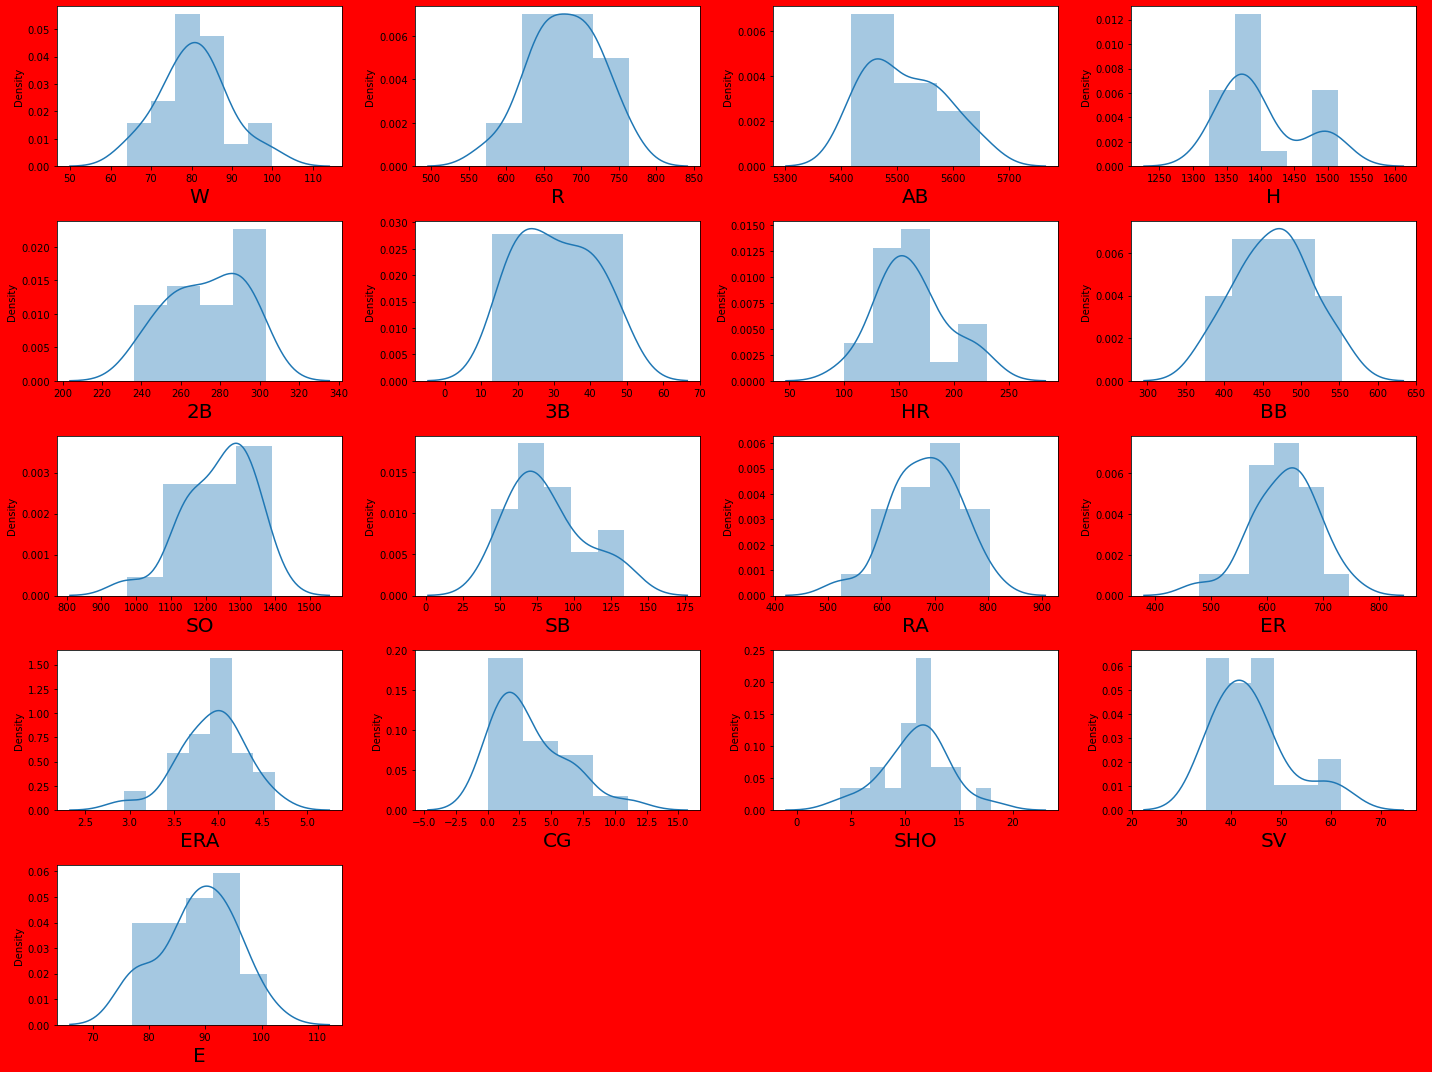

In [30]:
#now lets check if the outliers are removed
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [31]:
data.shape


(30, 17)

In [32]:
df.shape

(21, 17)

In [33]:
df_features2=df.drop('W', axis=1)

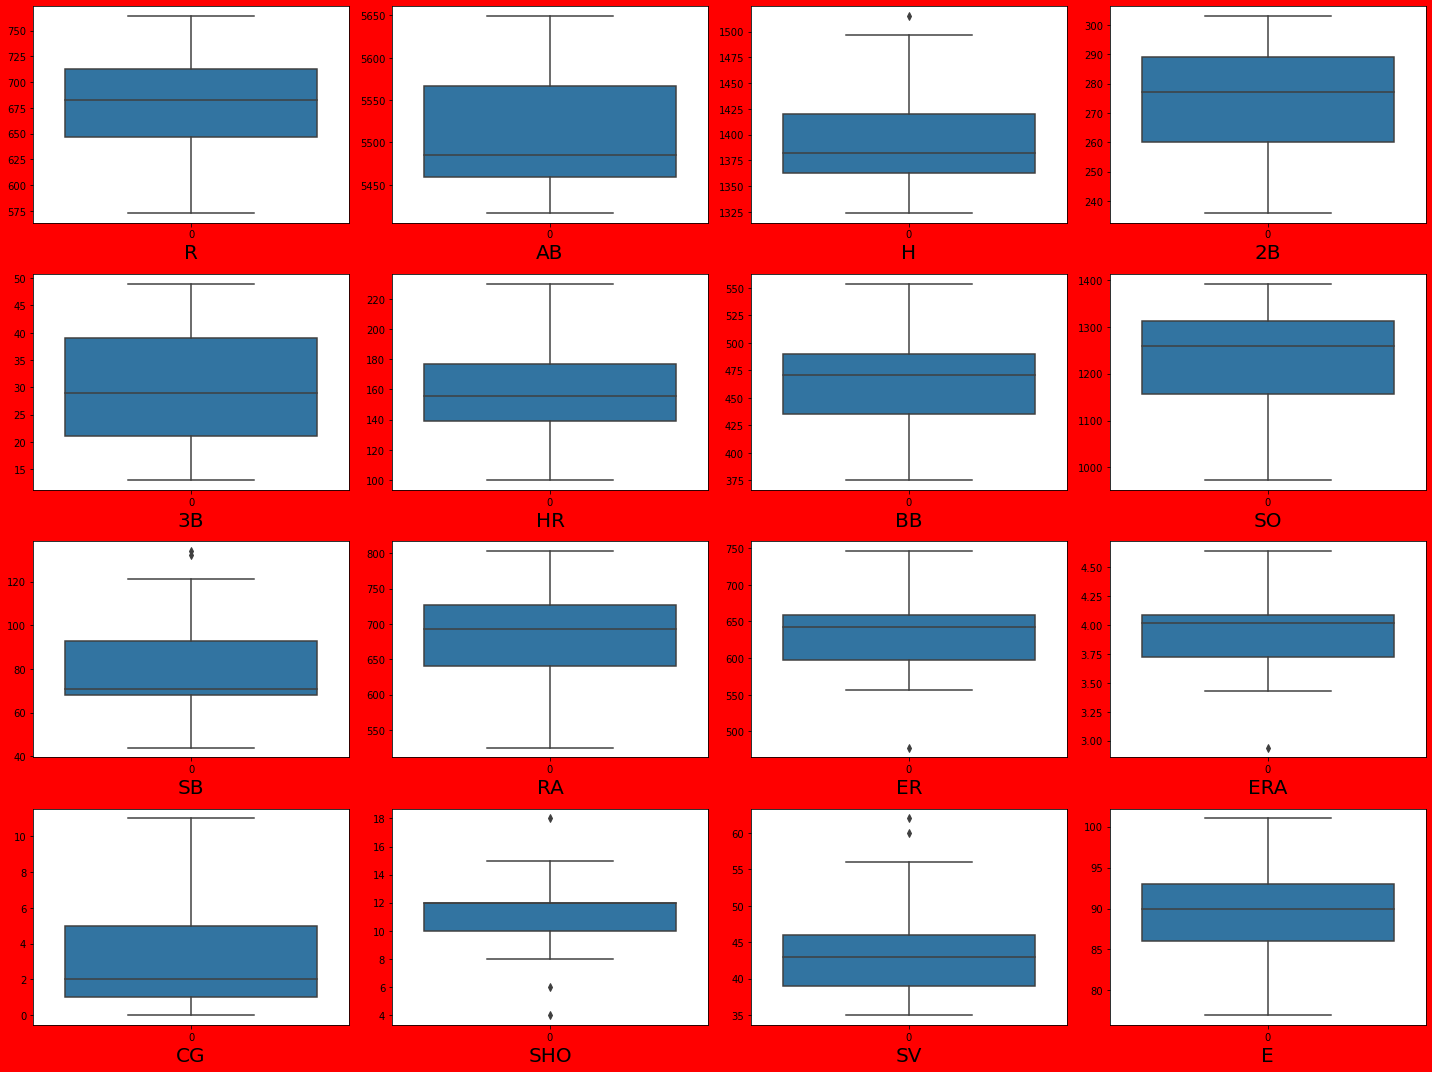

In [34]:
#checking whether the outliers are removed by box plot
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in df_features2:
    if plotnumber<=16:
        plt.subplot(4,4,plotnumber)
        ax=sns.boxplot(data=df_features2[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

After removing the outliers from the dataset we observed that new outliers are formed, so we will not remove the outliers and keep them as it is.

In [36]:
data.shape

(30, 17)

In [38]:
#using standard scalar for scaling the model
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x_scaled=scalar.fit_transform(x)

Now as the label or the target variable is a continuous data so this is a regression problem. We will be building some regression algorithms for this problem and we will find out the best machine learning model among them.

In [40]:
x_scaled.shape[1]

16

In [ ]:
# Finding the variance inflation factor (VIF) for each scaled column to know about the multi-colinerity


In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['Features']=x.columns


vif

,VIF,Features
0,11.522370,R
1,13.311532,AB
2,10.070668,H
3,4.019297,2B
4,3.294146,3B
5,10.079902,HR
6,3.806098,BB
7,2.652401,SO
8,2.102684,SB
9,191.839155,RA


Observations after finding the  variance inflation factor 

1.R ,AB, HR, RA, ER, ERA and Sv are highly multi-collinear with other features as they have a VIF score greater than 5.

2.2B, 3B, BB, SO, SB, CG, SHO, E are moderately multi-collinear with other features as they have a VIF scor between 1 and 5.

In [169]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC

In [170]:
#now lets split the dat into train and test for training nad testing of the the machine learning algorithms
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=100)
y_train.head()

6     87
17    97
22    71
11    86
4     74
Name: W, dtype: int64

# Linear Regression

In [171]:
# prediction through the linear regression algorithm
regression=LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [172]:
data.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [173]:
#prediction of number of wins
print('no of wins are', regression.predict(scalar.transform([[667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75]])))

no of wins are [83.76287051]


In [179]:
#how well the model fits the training data
regression.score(x_train, y_train)

0.9746429133899073

In [180]:
#lets check how well the model fits the testing data
regression.score(x_test, y_test)

-0.3532055809419459

In [181]:
#plotting the predicted value of y with the actual value of y
y_pred=regression.predict(x_test)
y_pred

array([ 81.76653983,  80.93369406,  87.09700007,  74.00253927,
       100.40068284,  77.33265769,  89.05252083,  83.76287051])

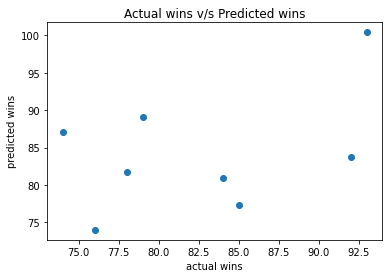

In [182]:

plt.scatter(y_test, y_pred)
plt.xlabel('actual wins')
plt.ylabel('predicted wins')
plt.title('Actual wins v/s Predicted wins')
plt.show()

The graph shows a upward linear trend.

# K Nearest Neighbours model

In [194]:
#splitting the datset into test and train
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)
y_train.head()

12     85
6      87
15    100
28     74
23     67
Name: W, dtype: int64

In [195]:
#Training the model

knn=KNeighborsRegressor()
knn.fit(x_train, y_train)




KNeighborsRegressor()

In [196]:
#prediction of number of wins
print('no of wins are', knn.predict(scalar.transform([[667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75]])))

no of wins are [87.6]


In [197]:
#how well the model fits the training data
knn.score(x_train, y_train)

0.826334243162542

In [198]:
#lets check how well the model fits the testing data
knn.score(x_test, y_test)

0.09629350893697075

In [200]:
#plotting the predicted value of y with the actual value of y
y_pred=knn.predict(x_test)
y_pred


array([75.4, 75.4, 80.8, 80.2, 87.6, 85.6, 72.8, 82.6])

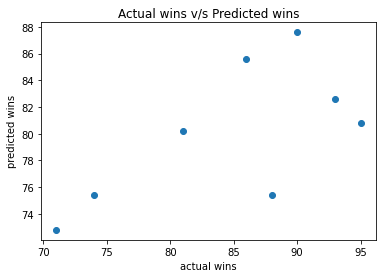

In [201]:
plt.scatter(y_test, y_pred)
plt.xlabel('actual wins')
plt.ylabel('predicted wins')
plt.title('Actual wins v/s Predicted wins')
plt.show()

# SVM Model

In [202]:
from sklearn.svm import SVR
# splitting the DataFrame into tain and test
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)
y_train.head()

12     85
6      87
15    100
28     74
23     67
Name: W, dtype: int64

In [203]:
# training the data
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [204]:
#prediction of number of wins
print('no of wins are', svr.predict(scalar.transform([[667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75]])))

no of wins are [81.83577957]


In [205]:
#how well the model fits the training data
svr.score(x_train, y_train)

0.26093808734794366

In [206]:
#lets check how well the model fits the testing data
svr.score(x_test, y_test)

-0.2971466302084991

In [207]:
#plotting the predicted value of y with the actual value of y
y_pred=svr.predict(x_test)
y_pred

array([78.10781595, 78.19840588, 79.67693896, 79.66847321, 81.16837357,
       80.37451566, 78.63809213, 79.88761194])

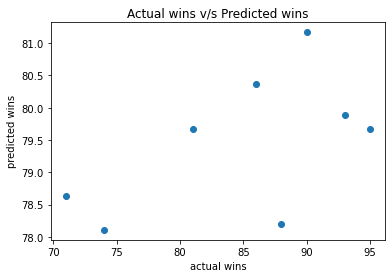

In [208]:
plt.scatter(y_test, y_pred)
plt.xlabel('actual wins')
plt.ylabel('predicted wins')
plt.title('Actual wins v/s Predicted wins')
plt.show()

# Random Forest Model

In [216]:
from sklearn.ensemble import RandomForestRegressor
# splitting the DataFrame into tain and test
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)
y_train.head()

12     85
6      87
15    100
28     74
23     67
Name: W, dtype: int64

In [217]:
# training the data
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [220]:
#prediction of number of wins
print('no of wins are', rf.predict(scalar.transform([[667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75]])))

no of wins are [92.97]


In [222]:
#how well the model fits the training data
rf.score(x_train, y_train)

0.9672383813588818

In [223]:
#lets check how well the model fits the testing data
rf.score(x_test, y_test)

-0.13990065851364064

In [224]:
#plotting the predicted value of y with the actual value of y
y_pred=rf.predict(x_test)
y_pred

array([69.48, 71.69, 83.84, 81.56, 93.39, 83.83, 80.04, 83.17])

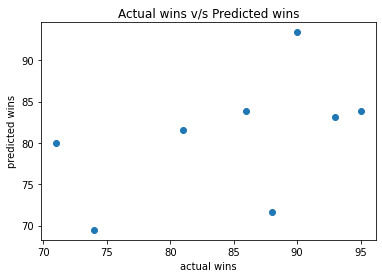

In [225]:
plt.scatter(y_test, y_pred)
plt.xlabel('actual wins')
plt.ylabel('predicted wins')
plt.title('Actual wins v/s Predicted wins')
plt.show()

# Selection of the best Machine learning Model

We have Instantiated 4 different models and checked their predicted no of wins and we have also checked in each case how well the model fits the training and testing data. we are evaluating the model based on thie adjusted R2 scores. Based on the adjusted R2 scores we have identified the linear regression model to be the best model in this case and we will carry our investigation forward with the linear regression model.

In [239]:
#now lets use some more model evaluation techniques on linear regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [240]:
y_pred=regression.predict(x_test)
y_pred

array([ 72.80368803,  85.21335513,  95.2173037 ,  81.09808581,
        87.57491191,  84.50273948,  69.33989994, 100.40068284])

In [241]:
mean_absolute_error(y_test,y_pred)

2.160184731721488

In [242]:
mean_squared_error(y_test,y_pred)

9.362784202797748

In [243]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.0598666969000052

We can observe that the error is little bit more. so now lets see if our model is overfitting or not by using some regularization techniques.

In [257]:
from sklearn.linear_model import Ridge ,Lasso ,RidgeCV,LassoCV
lasscv=LassoCV(alphas=None, max_iter=100 ,normalize=True )
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [261]:
#finding the value of alpha
alpha=lasscv.alpha_
alpha

0.16238104830020703

In [260]:
#now that we have best parameters lets use lasso regression and see how our datahas fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.16238104830020703)

In [263]:
#r2 score
lasso_reg.score(x_test,y_test)

0.7554933419784629

In [265]:
#using ridge regularization
ridgecv=RidgeCV(alphas= np.arange(0.001,0.1,0.01) ,normalize=True )
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [266]:
ridgecv.alpha_

0.09099999999999998

In [267]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [268]:
#adjusted r2 score
ridge_model.score(x_test,y_test)

0.8314290808838886

we have got arround the same adjusted R2 (r squared) value from both ridge and Lasso regression so, it is safe to say that there is no overfitting problem here. from this we can say that the OLS model has been well trained on the training data.

Now lets use some Cross validation  and hyperparameter tuning techniques to see whether we can improve the accuracy of our model.

In [294]:
#cross validation

from sklearn.model_selection import cross_val_score
cross_val_score(regression,x_scaled,y,cv=10)

array([  0.81849548,   0.54345971,  -5.03578497,   0.14987268,
        -2.36573236, -43.40241512,   0.81944679,   0.75303978,
         0.87348374,  -0.59821638])

In [298]:
cross_val_score(LinearRegression(),x_scaled,y,cv=5).mean()

0.04075540667455883

In [299]:
#cross validation using Linear regression

from sklearn.model_selection import cross_val_score
cross_val_score(knn,x_scaled,y,cv=5)

array([ 0.3164476 , -2.36687023,  0.32268088,  0.34337206,  0.56615385])

In [300]:
cross_val_score(KNeighborsRegressor(),x_scaled,y,cv=5).mean()

-0.1636431681468944

# Hyperparameter Tuning

As we have taken linear regression as our final machine learning algorithm so hyperparameter tuning is not possible in linear regression. lets perform the hyperparameter tunning in knn method.

In [305]:
from sklearn.model_selection import GridSearchCV
param_grid={'algorithm':['kd_tree','brute'],'leaf_size':[3,5,6,7,8],'n_neighbors':[3,5,7,9,11,13]}

In [306]:
gridsearch=GridSearchCV(estimator= knn , param_grid=param_grid )

In [307]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [308]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 3}

In [309]:
knn=KNeighborsRegressor(algorithm='kd_tree', leaf_size=3,n_neighbors=3)

In [310]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [311]:
ypred=knn.predict(x_test)

In [312]:
knn.score(x_test, y_test)


-0.02769938329674959

In [313]:
knn.score(x_train,y_train)

0.8400043964901354

In [315]:
#plotting the predicted value of y with the actual value of y
y_pred=knn.predict(x_test)
y_pred


array([75.        , 74.        , 80.33333333, 81.33333333, 87.66666667,
       85.33333333, 73.66666667, 82.        ])

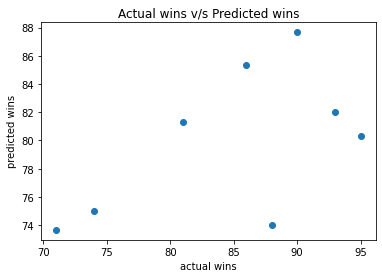

In [316]:
plt.scatter(y_test, y_pred)
plt.xlabel('actual wins')
plt.ylabel('predicted wins')
plt.title('Actual wins v/s Predicted wins')
plt.show()

the accuracyy is little bit increased from 82% to 84% so our hyperparameter tuning is successful. lets save the model for future use.

In [317]:

#saving the machine learning model
import pickle
filename='finalized_model.pickle'
pickle.dump(knn,open('finalized_model.pickle','wb'))